## Ok, here we define and implement the required functions to create the Data Set
This includes extracting the moments of the original and dominant channel images

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2

# Inline plotting
%matplotlib inline

In [6]:
# corner_cut - Extracts a subimage from an image img, using coords to define the center of the image.
# This is only included to test the code
def corner_cut(img, coords, pixh, pixw):
    
    #define frame for the cut
    x = [coords[0], coords[0] + pixw]
    y = [coords[1], coords[1] + pixh]

    #check lower boundaries
    if x[0] < 0: x = [0,pixw]
    if y[0] < 0: y = [0,pixh]

    #check upper boundaries
    if x[1] > img.shape[0]: x = [img.shape[0] - pixw,img.shape[0] - 1]
    if y[1] > img.shape[1]: y = [img.shape[1] - pixh,img.shape[1] - 1]
    
    return img[x[0]:x[1], y[0]:y[1],:]

In [1]:
# Dom_Channel - Returns an image with the dominant color channel from a given image
def Dom_Channel(img_org):
    img_dom_Channel = np.argmax(img_org, axis = 2)
    img_dom = np.zeros_like(img_org)
    a,b,_ = img_org.shape
    for i in range(a):
        for j in range(b):
            img_dom[i,j,img_dom_Channel[i,j]] = 255
    return img_dom

In [7]:
# There are way too many entries, and it is better to have an standardized set
# of labels

# Original image
Reg_labels = ['m00_R','m00_G','m00_B','m01_R','m01_G','m01_B',
              'm02_R','m02_G','m02_B','m03_R','m03_G','m03_B',
              'm10_R','m10_G','m10_B','m11_R','m11_G','m11_B',
              'm12_R','m12_G','m12_B','m20_R','m20_G','m20_B',
              'm21_R','m21_G','m21_B','m30_R','m30_G','m30_B',
              'mu02_R','mu02_G','mu02_B','mu03_R','mu03_G','mu03_B',
              'mu11_R','mu11_G','mu11_B','mu12_R','mu12_G','mu12_B',
              'mu20_R','mu20_G','mu20_B','mu21_R','mu21_G','mu21_B',
              'mu30_R','mu30_G','mu30_B','nu02_R','nu02_G','nu02_B',
              'nu03_R','nu03_G','nu03_B','nu11_R','nu11_G','nu11_B',
              'nu12_R','nu12_G','nu12_B','nu20_R','nu20_G','nu20_B',
              'nu21_R','nu21_G','nu21_B','nu30_R','nu30_G','nu30_B',
              'Hu_R1','Hu_G1','Hu_B1','Hu_R2','Hu_G2','Hu_B2',
              'Hu_R3','Hu_G3','Hu_B3','Hu_R4','Hu_G4','Hu_B4',
              'Hu_R5','Hu_G5','Hu_B5','Hu_R6','Hu_G6','Hu_B6',
              'Hu_R7','Hu_G7','Hu_B7']

# Dominant channel image
Dom_labels = ['Dom_m00_R','Dom_m00_G','Dom_m00_B','Dom_m01_R','Dom_m01_G','Dom_m01_B',
              'Dom_m02_R','Dom_m02_G','Dom_m02_B','Dom_m03_R','Dom_m03_G','Dom_m03_B',
              'Dom_m10_R','Dom_m10_G','Dom_m10_B','Dom_m11_R','Dom_m11_G','Dom_m11_B',
              'Dom_m12_R','Dom_m12_G','Dom_m12_B','Dom_m20_R','Dom_m20_G','Dom_m20_B',
              'Dom_m21_R','Dom_m21_G','Dom_m21_B','Dom_m30_R','Dom_m30_G','Dom_m30_B',
              'Dom_mu02_R','Dom_mu02_G','Dom_mu02_B','Dom_mu03_R','Dom_mu03_G','Dom_mu03_B',
              'Dom_mu11_R','Dom_mu11_G','Dom_mu11_B','Dom_mu12_R','Dom_mu12_G','Dom_mu12_B',
              'Dom_mu20_R','Dom_mu20_G','Dom_mu20_B','Dom_mu21_R','Dom_mu21_G','Dom_mu21_B',
              'Dom_mu30_R','Dom_mu30_G','Dom_mu30_B','Dom_nu02_R','Dom_nu02_G','Dom_nu02_B',
              'Dom_nu03_R','Dom_nu03_G','Dom_nu03_B','Dom_nu11_R','Dom_nu11_G','Dom_nu11_B',
              'Dom_nu12_R','Dom_nu12_G','Dom_nu12_B','Dom_nu20_R','Dom_nu20_G','Dom_nu20_B',
              'Dom_nu21_R','Dom_nu21_G','Dom_nu21_B','Dom_nu30_R','Dom_nu30_G','Dom_nu30_B',
              'Dom_Hu_R1','Dom_Hu_G1','Dom_Hu_B1','Dom_Hu_R2','Dom_Hu_G2','Dom_Hu_B2',
              'Dom_Hu_R3','Dom_Hu_G3','Dom_Hu_B3','Dom_Hu_R4','Dom_Hu_G4','Dom_Hu_B4',
              'Dom_Hu_R5','Dom_Hu_G5','Dom_Hu_B5','Dom_Hu_R6','Dom_Hu_G6','Dom_Hu_B6',
              'Dom_Hu_R7','Dom_Hu_G7','Dom_Hu_B7']


In [27]:
# Here we define a function that returns a DataFrame with the appropriate momentum entries
def Moments_df(Images, df_labels):

    Waldo_moments = []
    Waldo_Hu = []

    for image in Images:    
        Moments = [cv2.moments(image[:,:,0]),
                  cv2.moments(image[:,:,1]),
                  cv2.moments(image[:,:,2])]    
        HuMoments = [cv2.HuMoments(Moments[0]),
                     cv2.HuMoments(Moments[1]),
                     cv2.HuMoments(Moments[2])]
        
        for i in range(0,3):
            temp = HuMoments[i]
            for j in range(0,7):
                temp = HuMoments[i][j]
                HuMoments[i][j] = -np.sign(temp)* np.log10(abs(temp))
        
        Waldo_moments.append(Moments)
        Waldo_Hu.append(HuMoments)

    m00_R_l, m00_G_l, m00_B_l, m01_R_l, m01_G_l, m01_B_l = [],[],[],[],[],[]
    m02_R_l, m02_G_l, m02_B_l, m03_R_l, m03_G_l, m03_B_l = [],[],[],[],[],[]
    m10_R_l, m10_G_l, m10_B_l, m11_R_l, m11_G_l, m11_B_l = [],[],[],[],[],[]
    m12_R_l, m12_G_l, m12_B_l, m20_R_l, m20_G_l, m20_B_l = [],[],[],[],[],[]
    m21_R_l, m21_G_l, m21_B_l, m30_R_l, m30_G_l, m30_B_l = [],[],[],[],[],[]

    mu02_R_l, mu02_G_l, mu02_B_l, mu03_R_l, mu03_G_l, mu03_B_l = [],[],[],[],[],[]
    mu11_R_l, mu11_G_l, mu11_B_l, mu12_R_l, mu12_G_l, mu12_B_l = [],[],[],[],[],[]
    mu20_R_l, mu20_G_l, mu20_B_l, mu21_R_l, mu21_G_l, mu21_B_l = [],[],[],[],[],[]
    mu30_R_l, mu30_G_l, mu30_B_l = [],[],[]

    nu02_R_l, nu02_G_l, nu02_B_l, nu03_R_l, nu03_G_l, nu03_B_l = [],[],[],[],[],[]
    nu11_R_l, nu11_G_l, nu11_B_l, nu12_R_l, nu12_G_l, nu12_B_l = [],[],[],[],[],[]
    nu20_R_l, nu20_G_l, nu20_B_l, nu21_R_l, nu21_G_l, nu21_B_l = [],[],[],[],[],[]
    nu30_R_l, nu30_G_l, nu30_B_l = [],[],[]

    HuR1_l, HuG1_l, HuB1_l, HuR2_l, HuG2_l, HuB2_l = [],[],[],[],[],[]
    HuR3_l, HuG3_l, HuB3_l, HuR4_l, HuG4_l, HuB4_l = [],[],[],[],[],[]
    HuR5_l, HuG5_l, HuB5_l, HuR6_l, HuG6_l, HuB6_l = [],[],[],[],[],[]
    HuR7_l, HuG7_l, HuB7_l = [],[],[]


    for i in range(len(Waldo_moments)):
        m00_R_l.append(Waldo_moments[i][0]['m00'])
        m00_G_l.append(Waldo_moments[i][1]['m00'])
        m00_B_l.append(Waldo_moments[i][2]['m00'])
        m01_R_l.append(Waldo_moments[i][0]['m01'])
        m01_G_l.append(Waldo_moments[i][1]['m01'])
        m01_B_l.append(Waldo_moments[i][2]['m01'])
        m02_R_l.append(Waldo_moments[i][0]['m02'])
        m02_G_l.append(Waldo_moments[i][1]['m02'])
        m02_B_l.append(Waldo_moments[i][2]['m02'])
        m03_R_l.append(Waldo_moments[i][0]['m03'])
        m03_G_l.append(Waldo_moments[i][1]['m03'])
        m03_B_l.append(Waldo_moments[i][2]['m03'])
        m10_R_l.append(Waldo_moments[i][0]['m10'])
        m10_G_l.append(Waldo_moments[i][1]['m10'])
        m10_B_l.append(Waldo_moments[i][2]['m10'])
        m11_R_l.append(Waldo_moments[i][0]['m11'])
        m11_G_l.append(Waldo_moments[i][1]['m11'])
        m11_B_l.append(Waldo_moments[i][2]['m11'])
        m12_R_l.append(Waldo_moments[i][0]['m12'])
        m12_G_l.append(Waldo_moments[i][1]['m12'])
        m12_B_l.append(Waldo_moments[i][2]['m12'])
        m20_R_l.append(Waldo_moments[i][0]['m20'])
        m20_G_l.append(Waldo_moments[i][1]['m20'])
        m20_B_l.append(Waldo_moments[i][2]['m20'])
        m21_R_l.append(Waldo_moments[i][0]['m21'])
        m21_G_l.append(Waldo_moments[i][1]['m21'])
        m21_B_l.append(Waldo_moments[i][2]['m21'])
        m30_R_l.append(Waldo_moments[i][0]['m30'])
        m30_G_l.append(Waldo_moments[i][1]['m30'])
        m30_B_l.append(Waldo_moments[i][2]['m30'])

        mu02_R_l.append(Waldo_moments[i][0]['mu02'])
        mu02_G_l.append(Waldo_moments[i][1]['mu02'])
        mu02_B_l.append(Waldo_moments[i][2]['mu02'])
        mu03_R_l.append(Waldo_moments[i][0]['mu03'])
        mu03_G_l.append(Waldo_moments[i][1]['mu03'])
        mu03_B_l.append(Waldo_moments[i][2]['mu03'])
        mu11_R_l.append(Waldo_moments[i][0]['mu11'])
        mu11_G_l.append(Waldo_moments[i][1]['mu11'])
        mu11_B_l.append(Waldo_moments[i][2]['mu11'])
        mu12_R_l.append(Waldo_moments[i][0]['mu12'])
        mu12_G_l.append(Waldo_moments[i][1]['mu12'])
        mu12_B_l.append(Waldo_moments[i][2]['mu12'])
        mu20_R_l.append(Waldo_moments[i][0]['mu20'])
        mu20_G_l.append(Waldo_moments[i][1]['mu20'])
        mu20_B_l.append(Waldo_moments[i][2]['mu20'])
        mu21_R_l.append(Waldo_moments[i][0]['mu21'])
        mu21_G_l.append(Waldo_moments[i][1]['mu21'])
        mu21_B_l.append(Waldo_moments[i][2]['mu21'])
        mu30_R_l.append(Waldo_moments[i][0]['mu30'])
        mu30_G_l.append(Waldo_moments[i][1]['mu30'])
        mu30_B_l.append(Waldo_moments[i][2]['mu30'])

        nu02_R_l.append(Waldo_moments[i][0]['nu02'])
        nu02_G_l.append(Waldo_moments[i][1]['nu02'])
        nu02_B_l.append(Waldo_moments[i][2]['nu02'])
        nu03_R_l.append(Waldo_moments[i][0]['nu03'])
        nu03_G_l.append(Waldo_moments[i][1]['nu03'])
        nu03_B_l.append(Waldo_moments[i][2]['nu03'])
        nu11_R_l.append(Waldo_moments[i][0]['nu11'])
        nu11_G_l.append(Waldo_moments[i][1]['nu11'])
        nu11_B_l.append(Waldo_moments[i][2]['nu11'])
        nu12_R_l.append(Waldo_moments[i][0]['nu12'])
        nu12_G_l.append(Waldo_moments[i][1]['nu12'])
        nu12_B_l.append(Waldo_moments[i][2]['nu12'])
        nu20_R_l.append(Waldo_moments[i][0]['nu20'])
        nu20_G_l.append(Waldo_moments[i][1]['nu20'])
        nu20_B_l.append(Waldo_moments[i][2]['nu20'])
        nu21_R_l.append(Waldo_moments[i][0]['nu21'])
        nu21_G_l.append(Waldo_moments[i][1]['nu21'])
        nu21_B_l.append(Waldo_moments[i][2]['nu21'])
        nu30_R_l.append(Waldo_moments[i][0]['nu30'])
        nu30_G_l.append(Waldo_moments[i][1]['nu30'])
        nu30_B_l.append(Waldo_moments[i][2]['nu30'])

        HuR1_l.append(Waldo_Hu[i][0][0][0])
        HuG1_l.append(Waldo_Hu[i][1][0][0])
        HuB1_l.append(Waldo_Hu[i][2][0][0])
        HuR2_l.append(Waldo_Hu[i][0][1][0])
        HuG2_l.append(Waldo_Hu[i][1][1][0])
        HuB2_l.append(Waldo_Hu[i][2][1][0])
        HuR3_l.append(Waldo_Hu[i][0][2][0])
        HuG3_l.append(Waldo_Hu[i][1][2][0])
        HuB3_l.append(Waldo_Hu[i][2][2][0])
        HuR4_l.append(Waldo_Hu[i][0][3][0])
        HuG4_l.append(Waldo_Hu[i][1][3][0])
        HuB4_l.append(Waldo_Hu[i][2][3][0])
        HuR5_l.append(Waldo_Hu[i][0][4][0])
        HuG5_l.append(Waldo_Hu[i][1][4][0])
        HuB5_l.append(Waldo_Hu[i][2][4][0])
        HuR6_l.append(Waldo_Hu[i][0][5][0])
        HuG6_l.append(Waldo_Hu[i][1][5][0])
        HuB6_l.append(Waldo_Hu[i][2][5][0])
        HuR7_l.append(Waldo_Hu[i][0][6][0])
        HuG7_l.append(Waldo_Hu[i][1][6][0])
        HuB7_l.append(Waldo_Hu[i][2][6][0])


    values = [m00_R_l,m00_G_l,m00_B_l, m01_R_l, m01_G_l, m01_B_l,
       m02_R_l, m02_G_l, m02_B_l, m03_R_l, m03_G_l, m03_B_l,
       m10_R_l, m10_G_l, m10_B_l, m11_R_l, m11_G_l, m11_B_l,
       m12_R_l, m12_G_l, m12_B_l, m20_R_l, m20_G_l, m20_B_l,
       m21_R_l, m21_G_l, m21_B_l, m30_R_l, m30_G_l, m30_B_l,       
       mu02_R_l, mu02_G_l, mu02_B_l, mu03_R_l, mu03_G_l, mu03_B_l,
       mu11_R_l, mu11_G_l, mu11_B_l, mu12_R_l, mu12_G_l, mu12_B_l,
       mu20_R_l, mu20_G_l, mu20_B_l, mu21_R_l, mu21_G_l, mu21_B_l,       
       mu30_R_l, mu30_G_l, mu30_B_l, nu02_R_l, nu02_G_l, nu02_B_l,
       nu03_R_l, nu03_G_l, nu03_B_l, nu11_R_l, nu11_G_l, nu11_B_l,
       nu12_R_l, nu12_G_l, nu12_B_l, nu20_R_l, nu20_G_l, nu20_B_l,
       nu21_R_l, nu21_G_l, nu21_B_l, nu30_R_l, nu30_G_l, nu30_B_l,
       HuR1_l, HuG1_l, HuB1_l, HuR2_l, HuG2_l, HuB2_l,
       HuR3_l, HuG3_l, HuB3_l, HuR4_l, HuG4_l, HuB4_l,
       HuR5_l, HuG5_l, HuB5_l, HuR6_l, HuG6_l, HuB6_l,
       HuR7_l, HuG7_l, HuB7_l]
    

    dic = dict(zip(df_labels, values))
    
    Mom_df = pd.DataFrame(data=dic)
    return Mom_df

#### Lets test these stupid thing
We open an image and take some cuts

In [13]:
# Here we open and cut some frames from an image

# You can apply this to a set of images by including their name in the list
Filenames = ["W19"]

# Original image set
Im_set = [] 
# Dominant channel image set
Dom_set = [] 

Im_coord = []
h_pix = 64
w_pix = 64

for im in range(len(Filenames)):
    image = plt.imread(Filenames[im] + '.jpg')
    
    # We extract the image size
    size_y, size_x,_ = image.shape
    h_max, w_max = size_y//h_pix + 1, size_x//w_pix + 1
    
    # This line is comented out and changed to only apply it to few images
    #for i in range(h_max):
    for i in range(10):
        for j in range(w_max):
            coords = [i*h_pix, j*w_pix]
            Im_cut = corner_cut(image, coords, h_pix, w_pix)
            Im_set.append(Im_cut)
            # The dominant channel in easily computed
            Dom_set.append(Dom_Channel(Im_cut))

<function matplotlib.pyplot.show(*args, **kw)>

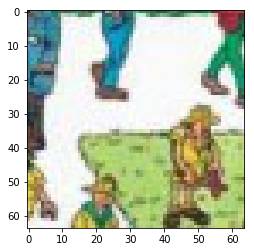

In [23]:
plt.imshow(Im_set[101])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

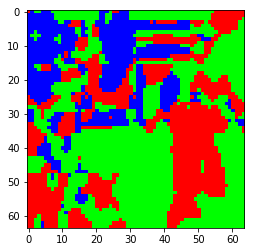

In [22]:
plt.imshow(Dom_set[101])
plt.show

In [30]:
Mom_df = Moments_df(Im_set,Reg_labels)

In [31]:
Mom_df.head()

,m00_R,m00_G,m00_B,m01_R,m01_G,m01_B,m02_R,m02_G,m02_B,m03_R,...,Hu_B4,Hu_R5,Hu_G5,Hu_B5,Hu_R6,Hu_G6,Hu_B6,Hu_R7,Hu_G7,Hu_B7
0,666465.0,895655.0,983630.0,22187845.0,28838555.0,31340692.0,979977895.0,1.236953e+09,1.330821e+09,4.831570e+10,...,13.407711,24.006028,26.218921,27.067741,16.337688,18.440774,-18.754751,24.225613,26.908949,-27.393568
1,658385.0,893021.0,984399.0,21730153.0,28676112.0,31371365.0,953438831.0,1.227241e+09,1.332749e+09,4.678491e+10,...,13.454354,24.511014,26.382141,27.017021,16.659716,18.805563,-18.917379,-24.494607,-26.760155,-27.290939
2,665389.0,897326.0,984705.0,22099948.0,28818558.0,31344343.0,975278918.0,1.234962e+09,1.330691e+09,4.807873e+10,...,13.430462,24.169692,26.689847,-28.560694,16.482226,18.816050,-18.655144,24.535146,26.530670,27.118154
3,676202.0,909018.0,1000107.0,22325486.0,28940891.0,31513753.0,983545900.0,1.236630e+09,1.334097e+09,4.847231e+10,...,16.312308,24.589818,28.554729,32.772897,16.622614,19.270800,-22.624183,-24.903936,-28.469017,32.940103
4,672690.0,907040.0,997582.0,22197450.0,28885069.0,31451330.0,977894306.0,1.234802e+09,1.331990e+09,4.818349e+10,...,15.430475,24.501794,28.258189,-30.739498,16.658304,19.340162,22.078320,-25.040671,-28.552187,31.087914


In [32]:
# It is common in my set to display this error. It just means some nan were produced
Dom_df = Moments_df(Dom_set, Dom_labels)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in multiply


In [33]:
Dom_df.fillna(0, inplace=True)

In [38]:
Dom_df.head()

,Dom_m00_R,Dom_m00_G,Dom_m00_B,Dom_m01_R,Dom_m01_G,Dom_m01_B,Dom_m02_R,Dom_m02_G,Dom_m02_B,Dom_m03_R,...,Dom_Hu_B4,Dom_Hu_R5,Dom_Hu_G5,Dom_Hu_B5,Dom_Hu_R6,Dom_Hu_G6,Dom_Hu_B6,Dom_Hu_R7,Dom_Hu_G7,Dom_Hu_B7
0,25755.0,40290.0,978435.0,1585590.0,2451315.0,28864215.0,97665000.0,149250225.0,1.145899e+09,6.018685e+09,...,13.685360,15.286600,14.745454,-26.933418,9.596042,9.560303,-18.030183,17.087438,16.837936,27.163759
1,17595.0,14790.0,1012095.0,1095735.0,920550.0,30884835.0,68247435.0,57304620.0,1.267262e+09,4.251393e+09,...,15.292774,12.833949,10.488212,-29.349056,8.236058,6.816899,19.995403,-16.362529,14.192633,-30.245315
2,33405.0,24480.0,986595.0,2056320.0,1487925.0,29356875.0,126648810.0,90512505.0,1.175653e+09,7.804386e+09,...,13.755704,14.410893,13.309885,-27.387992,9.242443,8.664550,-18.182488,-16.528597,-15.468468,-28.012381
3,33915.0,19635.0,990930.0,2080545.0,1194930.0,29625645.0,127699665.0,72797910.0,1.192317e+09,7.841999e+09,...,13.542844,15.415583,12.432729,26.873937,9.909072,7.976155,-18.456242,-18.557997,-14.439620,-27.022647
4,26520.0,26265.0,991695.0,1624350.0,1591965.0,29684805.0,99544860.0,96595785.0,1.196673e+09,6.103641e+09,...,13.674516,13.959632,12.250264,-26.984966,8.964100,8.014426,18.158461,-17.703015,-14.595756,-26.800902


In [39]:
# We join the Original and Channel dominant DataFrames, and we are done
Full_df = pd.concat([Mom_df, Dom_df], axis=1).reindex(Mom_df.index)

In [41]:
Full_df.head()

,m00_R,m00_G,m00_B,m01_R,m01_G,m01_B,m02_R,m02_G,m02_B,m03_R,...,Dom_Hu_B4,Dom_Hu_R5,Dom_Hu_G5,Dom_Hu_B5,Dom_Hu_R6,Dom_Hu_G6,Dom_Hu_B6,Dom_Hu_R7,Dom_Hu_G7,Dom_Hu_B7
0,666465.0,895655.0,983630.0,22187845.0,28838555.0,31340692.0,979977895.0,1.236953e+09,1.330821e+09,4.831570e+10,...,13.685360,15.286600,14.745454,-26.933418,9.596042,9.560303,-18.030183,17.087438,16.837936,27.163759
1,658385.0,893021.0,984399.0,21730153.0,28676112.0,31371365.0,953438831.0,1.227241e+09,1.332749e+09,4.678491e+10,...,15.292774,12.833949,10.488212,-29.349056,8.236058,6.816899,19.995403,-16.362529,14.192633,-30.245315
2,665389.0,897326.0,984705.0,22099948.0,28818558.0,31344343.0,975278918.0,1.234962e+09,1.330691e+09,4.807873e+10,...,13.755704,14.410893,13.309885,-27.387992,9.242443,8.664550,-18.182488,-16.528597,-15.468468,-28.012381
3,676202.0,909018.0,1000107.0,22325486.0,28940891.0,31513753.0,983545900.0,1.236630e+09,1.334097e+09,4.847231e+10,...,13.542844,15.415583,12.432729,26.873937,9.909072,7.976155,-18.456242,-18.557997,-14.439620,-27.022647
4,672690.0,907040.0,997582.0,22197450.0,28885069.0,31451330.0,977894306.0,1.234802e+09,1.331990e+09,4.818349e+10,...,13.674516,13.959632,12.250264,-26.984966,8.964100,8.014426,18.158461,-17.703015,-14.595756,-26.800902


The same can be done for one single image